In [425]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [426]:
# 타이타닉 데이터 다운로드
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


#Data Confirm

In [427]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [428]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [429]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [430]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [431]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [432]:
test_df.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# How many servived?

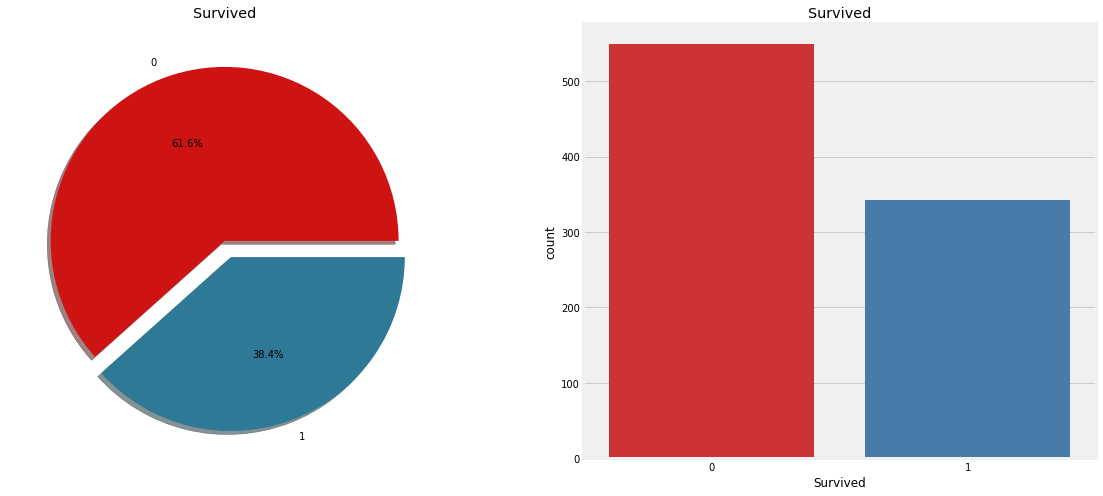

In [433]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
# Matplotlib 파이차트 그리기
# explode : 부채꼴이 파이 차트 중심에서 벗어나는 정도 설정(반지름의 n%만큼 벗어나도록 설정)
# autopct : 부채꼴 안에 표시될 숫자의 형식 지정. 소수점 한자리까지 표시하게 설정했다.

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['#ce1313', '#2d7996'])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.set_palette("Set1", 2) # sns.countplot color edit
sns.countplot('Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [434]:
# 성별과 생존여부를 묶어 count() 유용하다.
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

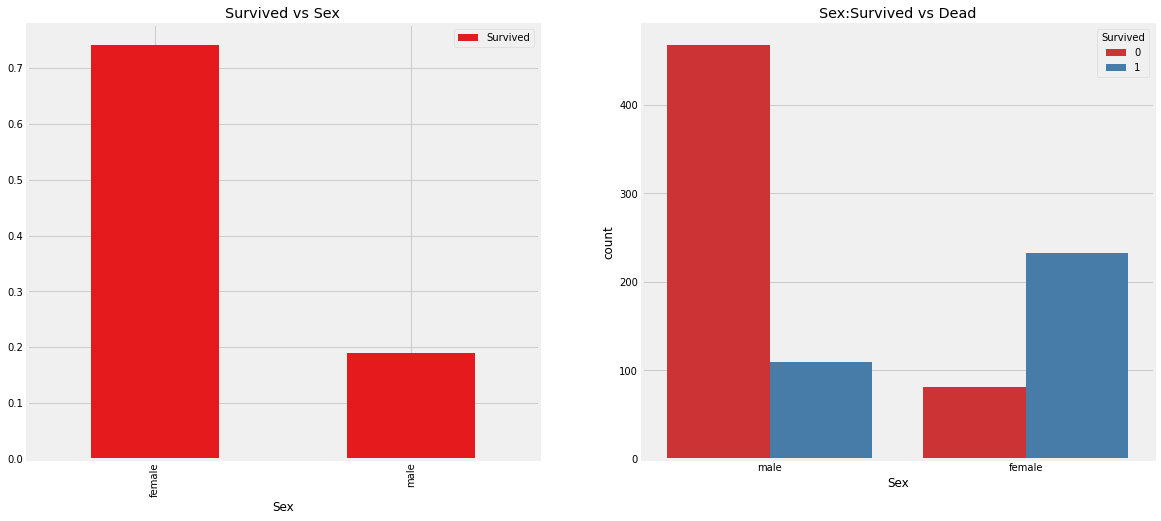

In [435]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#Pclass -> Ordinal Feature

In [436]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


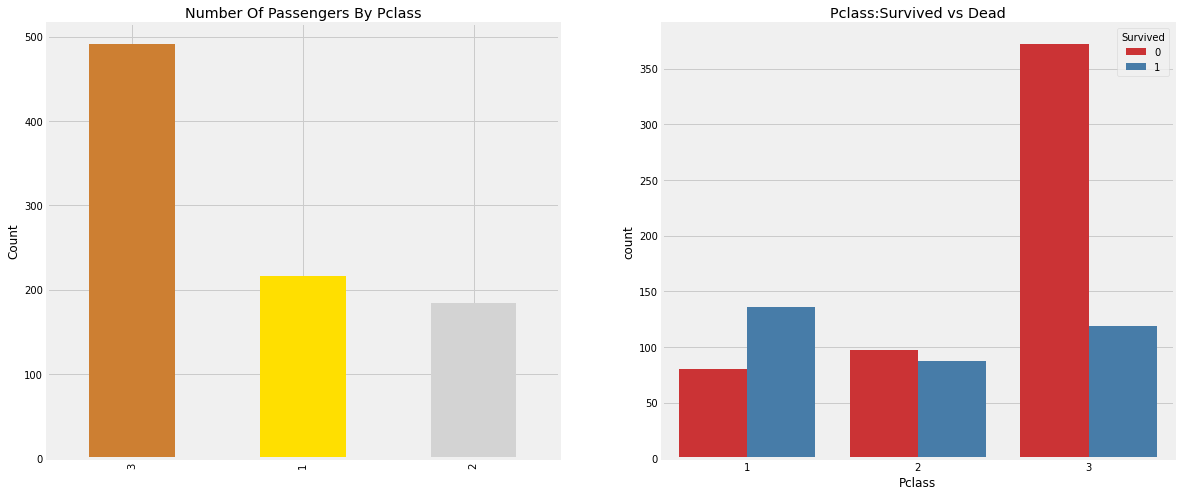

In [437]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [438]:
# crosstab
# 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용한다.
# crosstab 파라미터
# pd.crosstab(index=[], columns = ), index에는 y축에 넣을 값, columns에는 x축에 넣을 값을 넣어준다.
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

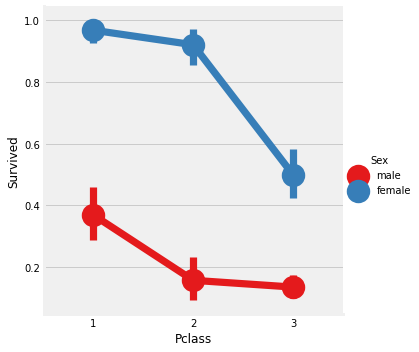

In [439]:
# factorplot
# 파라미터 (x, y, hue, col, kind, data),
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

#Age -> Continuous Feature

In [440]:
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


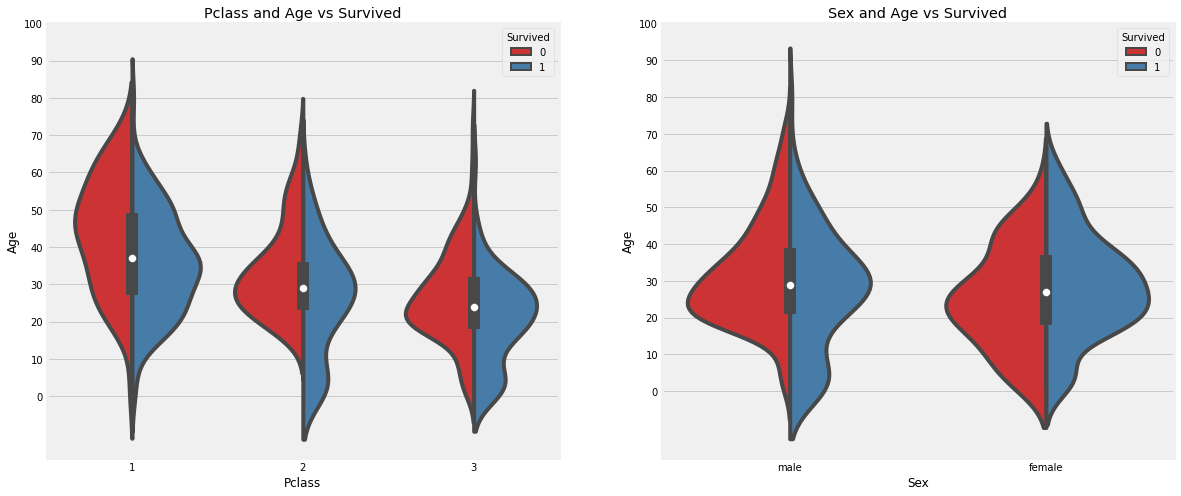

In [441]:
# viollinplot
# 박스 플롯 + 밀집도 그래프
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [442]:
train_df['Initial'] = 0
test_df['Initial'] = 0

for i in train_df:
  train_df['Initial'] = train_df.Name.str.extract('([A-Za-z]+)\.')

for i in test_df:
  test_df['Initial'] = test_df.Name.str.extract('([A-Za-z]+)\.')

In [443]:
pd.crosstab(train_df.Initial, train_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [444]:
pd.crosstab(test_df.Initial, test_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [445]:
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test_df['Initial'].replace(['Ms', 'Dr', 'Col', 'Rev', 'Dona'], ['Miss', 'Mr', 'Other', 'Other', 'Other'], inplace=True)

In [446]:
train_df.groupby('Initial')['Age'].mean() # lets check the average age by Initial

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [447]:
# Filiing NaN Ages
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Other'),'Age']=46

In [448]:
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Mr'),'Age']=33
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Mrs'),'Age']=36
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Master'),'Age']=5
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Miss'),'Age']=22
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Other'),'Age']=46

In [449]:
train_df.Age.isnull().any() # So no null values left finally

False

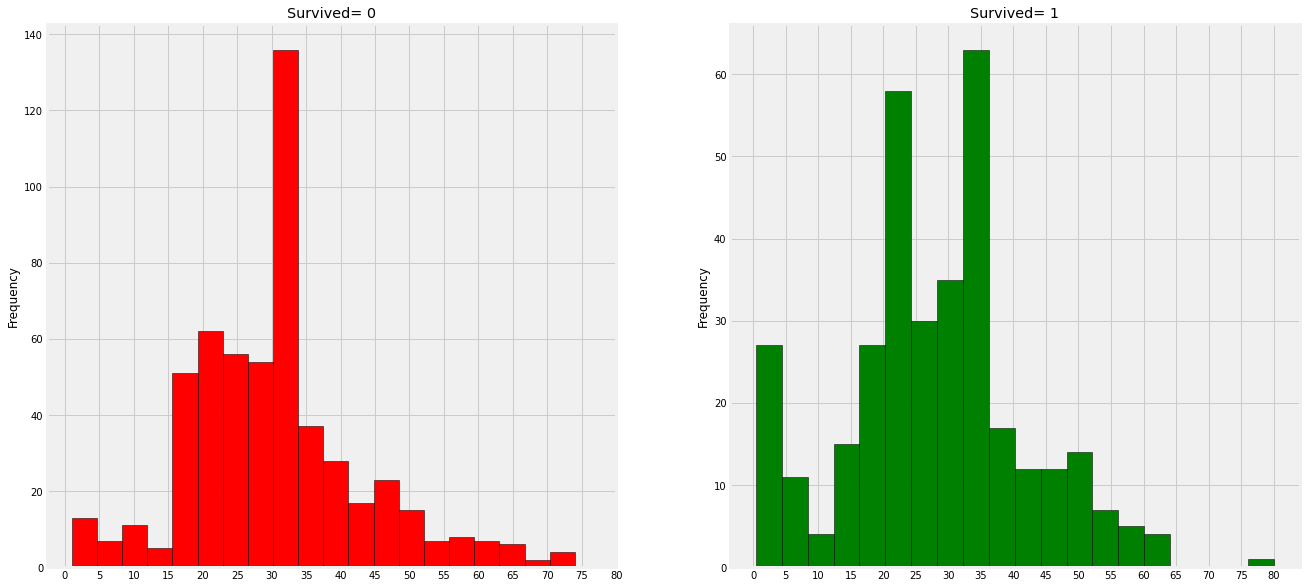

In [450]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

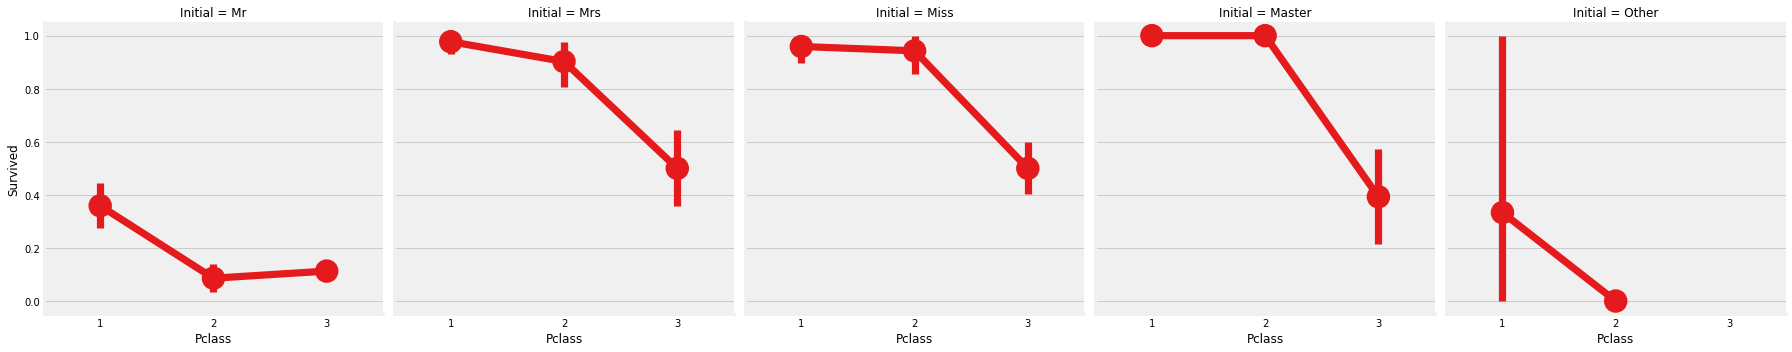

In [451]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_df)
plt.show()

#Embarked -> Categorical Value

In [452]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

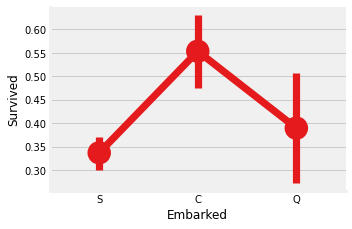

In [453]:
sns.factorplot('Embarked','Survived',data=train_df)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

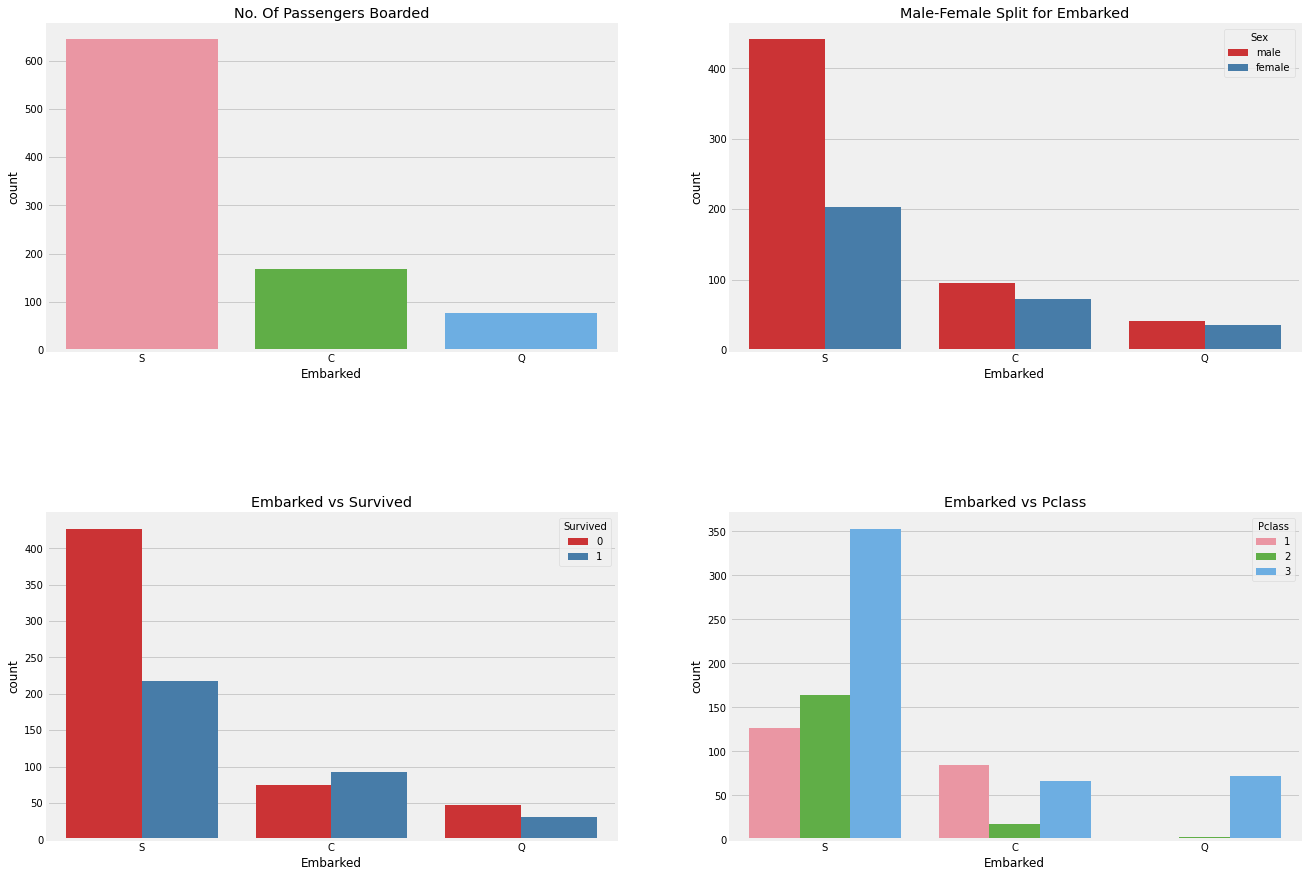

In [454]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train_df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train_df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train_df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train_df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

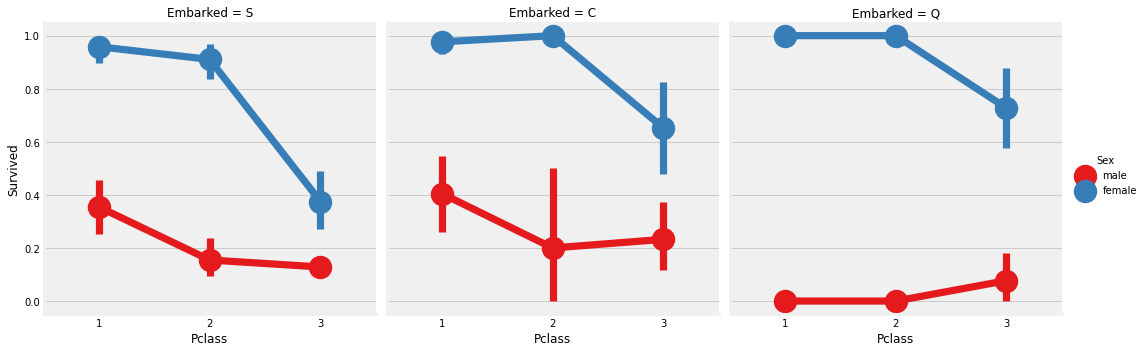

In [455]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df)
plt.show()

In [456]:
# 포트 S에서 탑승한 최대 승객을 보았으므로 NaN을 S로 바꾼다.
train_df['Embarked'].fillna('S', inplace=True)
train_df.Embarked.isnull().any()

False

#SibSip -> Discrete Feature

In [457]:
# 이 기능은 사람이 혼자인지 가족과 함께 있는지를 나타낸다.
# 형제자매 = 형제, 자매, 이복형제, 이복자매
# 배우자 = 남편, 아내
pd.crosstab([train_df.SibSp],train_df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


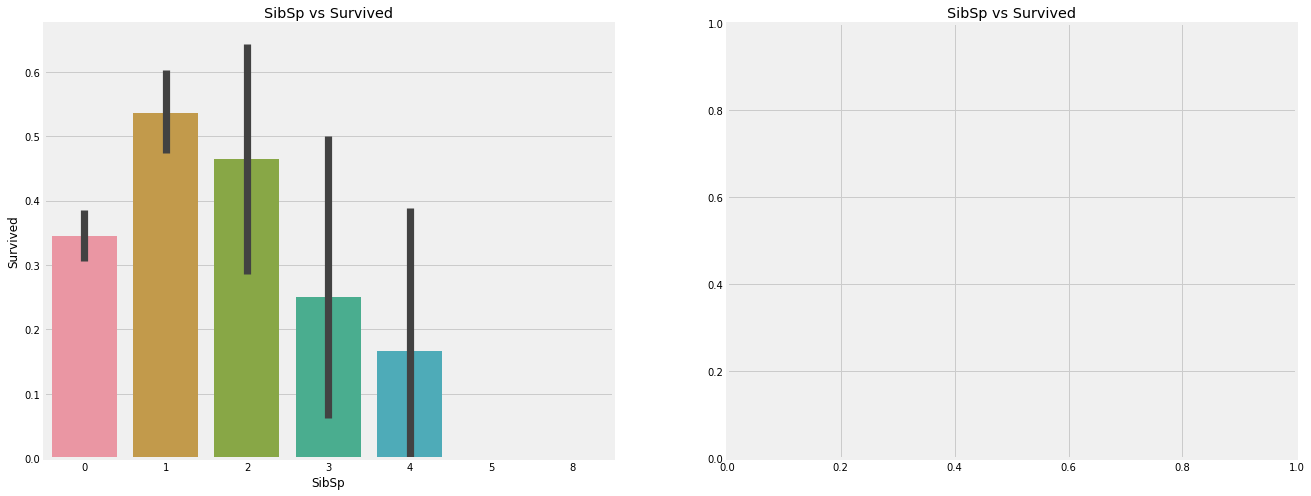

In [458]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train_df,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train_df,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [459]:
pd.crosstab(train_df.SibSp, train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [460]:
# Parch
pd.crosstab(train_df.Parch, train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


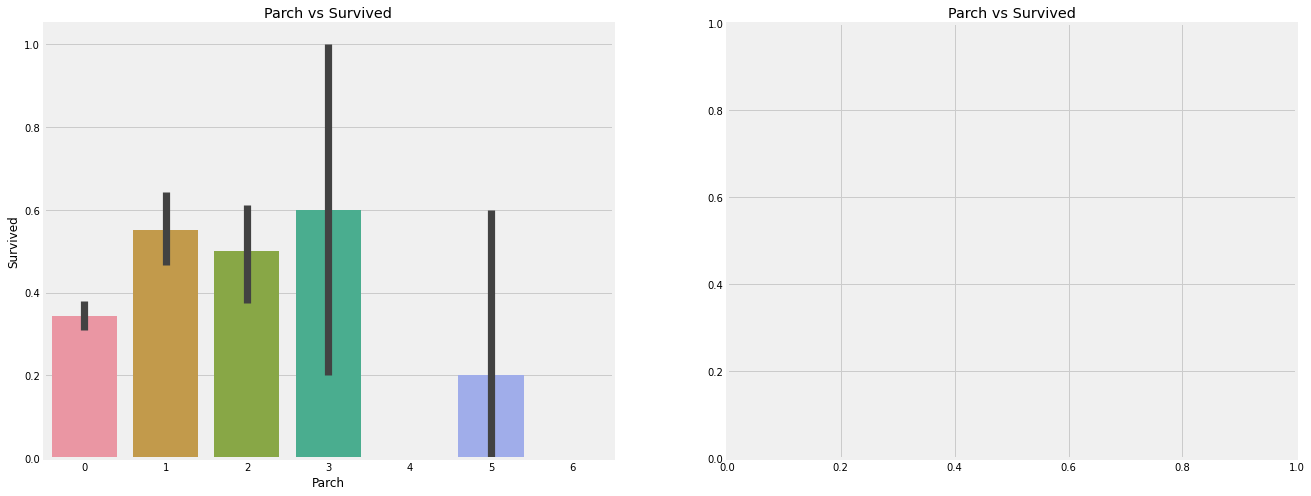

In [461]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train_df,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train_df,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#Fare -> Continuous Feature

In [462]:
print('Highest Fare was:', train_df['Fare'].max())
print('Lowest Fare was:',train_df['Fare'].min())
print('Average Fare was:',train_df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


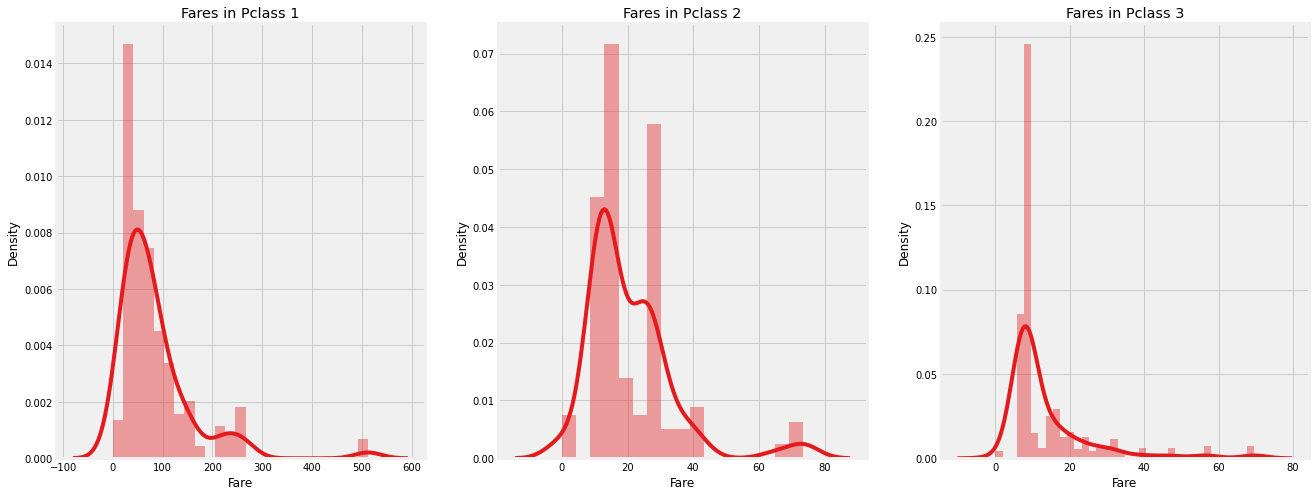

In [463]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

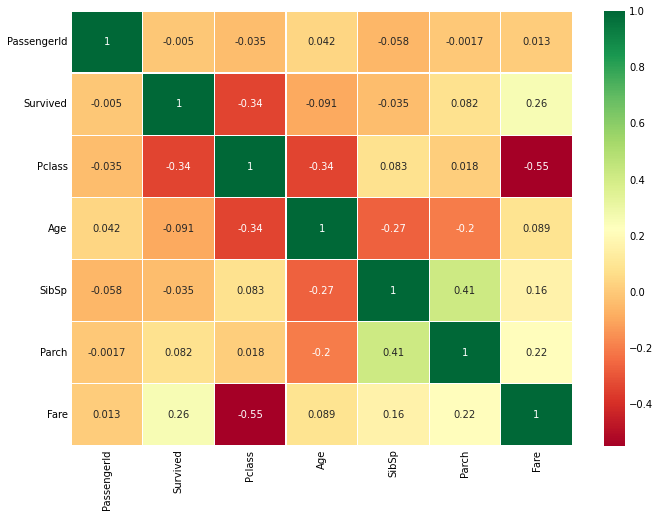

In [464]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 양의 상관관계 : 특성 A의 증가가 특성 B의 증가로 이어진다면 양의 상관 관계가 있다. 값 1은 완전한 양의 상관 관계를 의미한다.
# 음의 상관관계 : 특성 A의 증가가 특성 B의 감소로 이어지는 경우, 음의 상관 관계가 있다. 값 -1은 완전한 음의 상관 관계를 의미한다.
# 양 또는 음의 상관관계가 크다면 중복성이 있는 것이고, 상관관계가 적다면 중복성이 적은 것이다.
# 중복성이 크다면 중복제거가 필요하다.

#Age band

In [465]:
train_df['Age_band'] = 0
train_df.loc[train_df['Age']<=16, 'Age_band'] = 0
train_df.loc[(train_df['Age']>16) & (train_df['Age']<=32), 'Age_band'] = 1
train_df.loc[(train_df['Age']>32) & (train_df['Age']<=48), 'Age_band'] = 2
train_df.loc[(train_df['Age']>48) & (train_df['Age']<=64), 'Age_band'] = 3
train_df.loc[train_df['Age']>64, 'Age_band'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [466]:
test_df['Age_band'] = 0
test_df.loc[test_df['Age']<=16, 'Age_band'] = 0
test_df.loc[(test_df['Age']>16) & (test_df['Age']<=32), 'Age_band'] = 1
test_df.loc[(test_df['Age']>32) & (test_df['Age']<=48), 'Age_band'] = 2
test_df.loc[(test_df['Age']>48) & (test_df['Age']<=64), 'Age_band'] = 3
test_df.loc[test_df['Age']>64, 'Age_band'] = 4
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1


In [467]:
train_df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') # checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


In [468]:
test_df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') # checking the number of passengers in each band

,Age_band
1,193
2,148
0,38
3,37
4,2


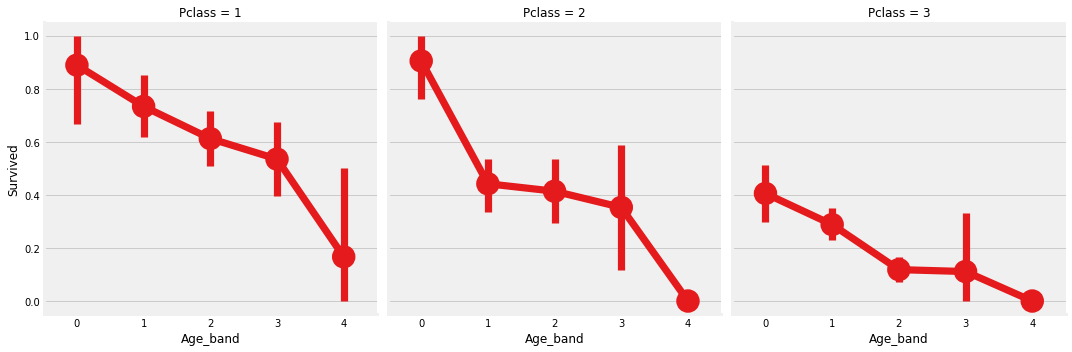

In [469]:
sns.factorplot('Age_band', 'Survived', data=train_df, col='Pclass')
plt.show()

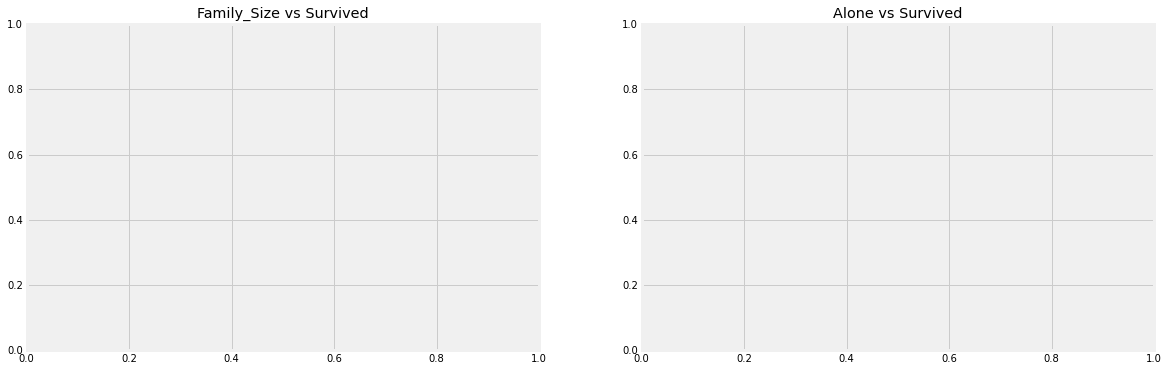

In [470]:
train_df['Family_Size']=0
train_df['Family_Size']=train_df['Parch']+train_df['SibSp']#family size
train_df['Alone']=0
train_df.loc[train_df.Family_Size==0,'Alone']=1#Alone

test_df['Family_Size']=0
test_df['Family_Size']=test_df['Parch']+test_df['SibSp']#family size
test_df['Alone']=0
test_df.loc[test_df.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=train_df,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=train_df,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

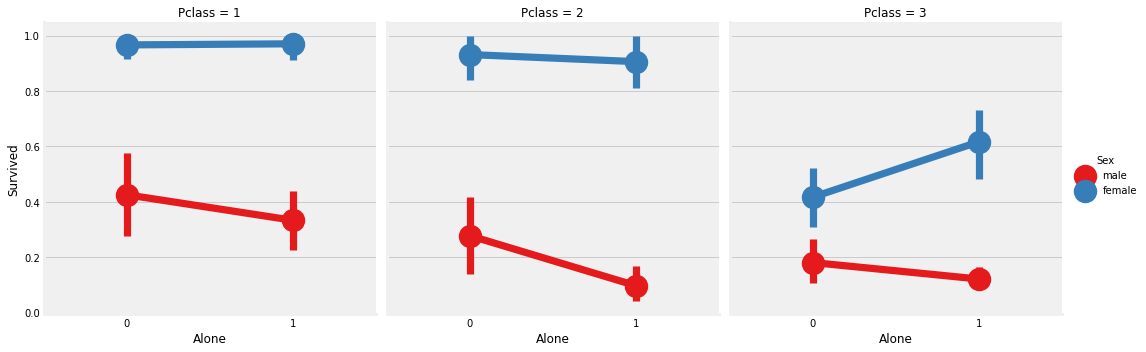

In [471]:
sns.factorplot('Alone', 'Survived', data=train_df, hue='Sex', col='Pclass')
plt.show()

#Fare_Range

In [472]:
train_df['Fare_Range'] = pd.qcut(train_df['Fare'], 4)
train_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]"


In [473]:
train_df['Fare_cat']=0
train_df.loc[train_df['Fare']<=7.91,'Fare_cat']=0
train_df.loc[(train_df['Fare']>7.91)&(train_df['Fare']<=14.454),'Fare_cat']=1
train_df.loc[(train_df['Fare']>14.454)&(train_df['Fare']<=31),'Fare_cat']=2
train_df.loc[(train_df['Fare']>31)&(train_df['Fare']<=513),'Fare_cat']=3

In [474]:
test_df['Fare_cat']=0
test_df.loc[test_df['Fare']<=7.91,'Fare_cat']=0
test_df.loc[(test_df['Fare']>7.91)&(test_df['Fare']<=14.454),'Fare_cat']=1
test_df.loc[(test_df['Fare']>14.454)&(test_df['Fare']<=31),'Fare_cat']=2
test_df.loc[(test_df['Fare']>31)&(test_df['Fare']<=513),'Fare_cat']=3

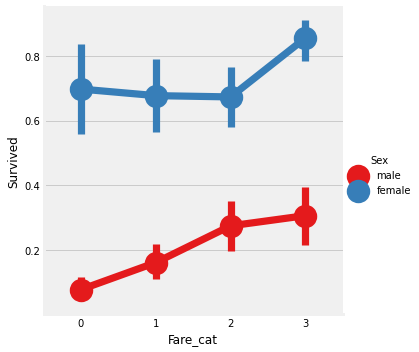

In [475]:
sns.factorplot('Fare_cat','Survived',data=train_df,hue='Sex')
plt.show()

In [476]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [477]:
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

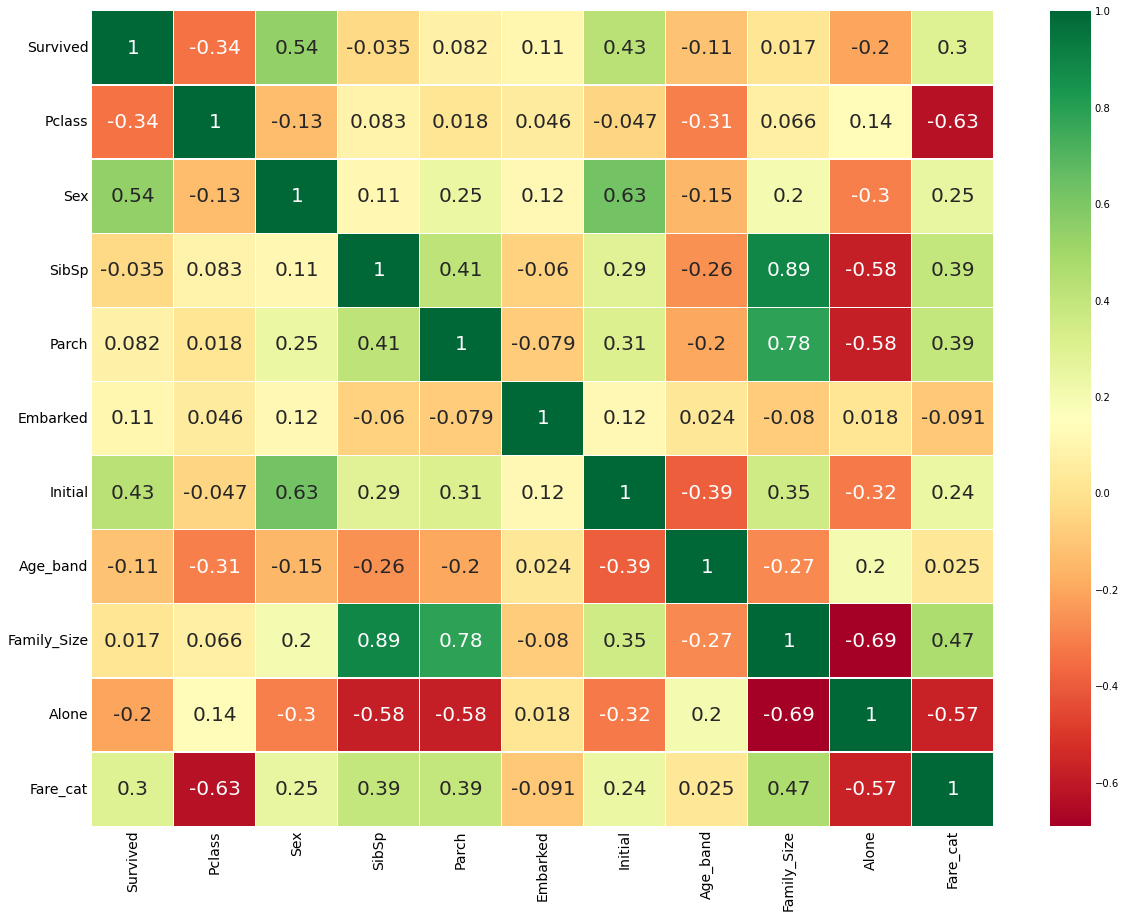

In [478]:
train_df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
test_df.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)

sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#Predictive Modeling

In [479]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.utils import shuffle

In [480]:
train,test=train_test_split(train_df, test_size=0.3, random_state=0, stratify=train_df['Survived'])
real_test = shuffle(test_df, random_state = 777)

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]] # Survived
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train_df[train_df.columns[1:]] # ?
Y=train_df['Survived']

In [481]:
train_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,3,0,0,0,0,0,1,0,1,0
836,3,0,0,0,0,0,1,0,1,1
639,3,0,1,0,0,0,2,1,0,2
389,2,1,0,0,1,2,1,0,1,1
597,3,0,0,0,0,0,3,0,1,0


In [482]:
real_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
381,3,0,0,0,2,0,1,0,1,0
178,2,1,0,3,0,1,2,3,0,3
382,3,1,0,0,0,1,2,0,1,2
320,3,0,0,0,0,0,1,0,1,0
150,1,1,0,1,1,1,1,1,0,3


#Radial Support Vector Machines(rbf-SVM)

In [483]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1) # gamma는 규제의 역할을 한다. 모델이 과대 적합일 경우 감소시켜야 하고, 과소적합일 경우 증가시켜야 한다.
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


#Logistic Regression

In [484]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#Decision Tree

In [485]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#K-Nearest Neighbours(KNN)

In [486]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


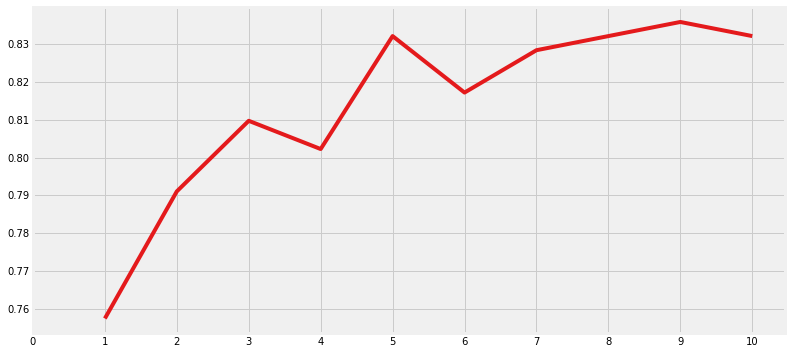

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [487]:
# n_neighbours의 기본값은 5이다.
# n_neighbours의 값을 변경해보며 확인해보기
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#Gaussian Naive Bayes

In [488]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#Cross Validation
---
The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model,we use Cross Validation.

In [489]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    # cross_val_score 함수가 검증에 사용하는 기본 측정 지표는 회귀일 때는 R^2, 분류일 때는 정확도이다.
    # 하지만 scoring 매개변수를 사용하여 다른 지표로 바꿀 수 있다.
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    # cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2.head()

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.812609,0.029445


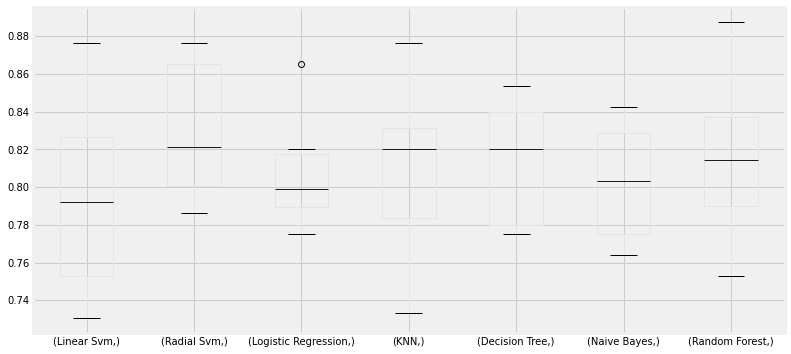

In [490]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

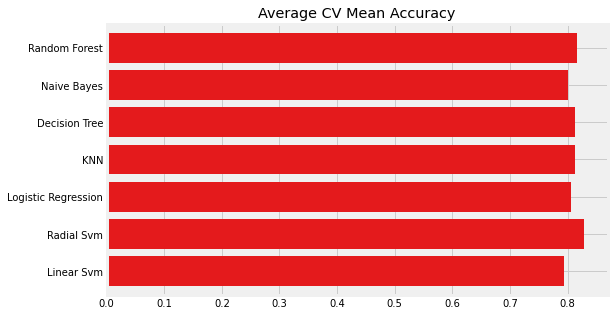

In [491]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf() # gcf() 메서드로 현재 Figure 객체를 구할 수 있다.
fig.set_size_inches(8,5)
plt.show()

#Confusion Matrix
---
It gives the number of correct and incorrect classifications made by the classifier.

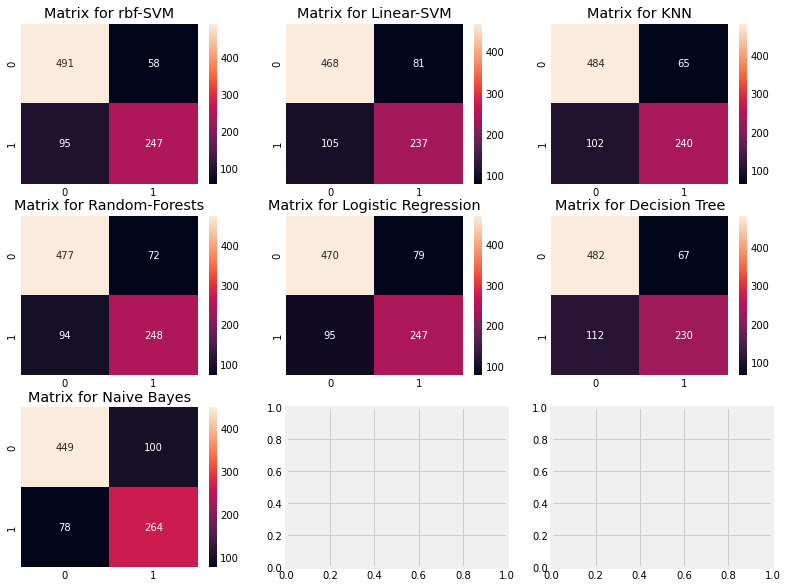

In [492]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#Hyper-Parameters Tuning
We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

In [493]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] # 가우시안 커널의 제어하는 매개변수
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print('t', gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


t 0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   23.8s finished


In [494]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   39.9s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

#Voting Classifier
It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [495]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237952559300874


#Bagging
Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

**Bagged KNN**   
Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours

In [496]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232
dfdf [0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 1 0 0]


In [497]:
gender_submission['Survived'] = model.predict(real_test)
gender_submission.to_csv('titanicEDA_submission.csv',index=False)

In [498]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227590511860174


#Boosting
Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.


In [499]:
# AdaBoost(Adaptive Boosting)
# The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [500]:
# Stochastic Gradient Boosting¶
# Here too the weak learner is a Decision Tree.
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [501]:
# XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


In [ ]:
# Hyper-Parameter Tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# Confusion Matrix for the Best Model
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [ ]:
# Feature Importance
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()